## Business Problem Understanding

**Context**

Perusahaan asuransi menghadapi tantangan besar dalam mempertahankan pelanggan mereka, karena biaya akuisisi pelanggan baru sering kali lebih tinggi daripada biaya untuk mempertahankan pelanggan yang sudah ada. Salah satu metrik kunci yang digunakan dalam industri asuransi untuk mengevaluasi nilai pelanggan adalah Customer Lifetime Value (CLV), yaitu prediksi nilai total keuntungan yang dihasilkan oleh pelanggan selama masa hubungan mereka dengan perusahaan.

Dataset ini mencakup informasi seperti jenis kendaraan, jenis cakupan asuransi, status penawaran perpanjangan, status pekerjaan pelanggan, tingkat pendidikan, pendapatan, jumlah klaim, premi bulanan, dan nilai CLV pelanggan. Tujuannya adalah untuk memahami faktor-faktor yang memengaruhi nilai CLV dan memprediksi nilai tersebut untuk pelanggan baru. Dengan demikian, perusahaan dapat menggunakan wawasan ini untuk mengoptimalkan strategi pemasaran dan meningkatkan profitabilitas.

**Problem Statement**

Salah satu tantangan utama dalam bisnis asuransi adalah bagaimana menentukan dan memprediksi CLV yang akurat. Jika prediksi terlalu rendah, perusahaan mungkin tidak mengalokasikan cukup sumber daya untuk mempertahankan pelanggan bernilai tinggi. Sebaliknya, prediksi yang terlalu tinggi dapat menyebabkan pengeluaran yang tidak perlu untuk pelanggan dengan nilai yang lebih rendah. Selain itu, memahami faktor-faktor yang memengaruhi CLV akan membantu perusahaan dalam merancang kebijakan yang lebih personal dan relevan.

**Goals**

Berdasarkan permasalahan yang ada, perusahaan asuransi membutuhkan alat prediksi yang dapat membantu menentukan nilai Customer Lifetime Value (CLV) secara akurat untuk setiap pelanggan. Dengan mempertimbangkan berbagai faktor seperti ketegori kendaraan, jenis asuransi, jumlah polis pelanggan, demografi, dan perilaku pelanggan, prediksi yang akurat memungkinkan perusahaan mengalokasikan sumber daya dengan lebih baik. Hal ini mendukung pengambilan keputusan strategis untuk mempertahankan pelanggan bernilai tinggi, meminimalkan pengeluaran yang tidak efektif, serta meningkatkan efisiensi operasional. Selain itu, prediksi CLV yang tepat dapat mendukung perancangan kebijakan personalisasi yang lebih relevan, sehingga meningkatkan kepuasan pelanggan dan profitabilitas perusahaan.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu fitur dengan yang lainnya.

- Eksplorasi Data: Memahami distribusi variabel, mengevaluasi hubungan antar variabel, dan mengidentifikasi data yang hilang atau outlier.
- Data preprocessing
- Transformasi Data: Menyiapkan data untuk analisis, termasuk encoding variabel kategorikal, normalisasi fitur, dan pembagian dataset.
- Pembuatan Model: Mengembangkan model prediktif menggunakan metode regresi.
- Evaluasi Model: Menilai performa model menggunakan metrik seperti RMSE, RMSLE, dan MAPE untuk memastikan prediksi CLV akurat.

**Metric Evaluation**

- Root Mean Squared Error (RMSE): Mengukur rata-rata kesalahan kuadrat yang dihasilkan oleh model. Nilai lebih rendah menunjukkan prediksi yang lebih akurat.
- Mean Absolute Error (RMSLE): mengukur perbedaan antara nilai sebenarnya dan nilai prediksi dalam skala logaritmik.
- Mean Absolute Percentage Error (MAPE): Menyediakan rata-rata kesalahan dalam bentuk persentase, memudahkan interpretasi.

Matric Evaluation ini di pakai karena data fitur target memiliki skala yang cukup besar dan bervariasi cocok dengan evaluation matric RMSE dan MAPE, matric ini cocok untuk pemodelan yang akan dilakukan, dan juga terdapat outlier pada beberapa fitur, yang dimana evaluation matric seperti RMSLE.

## Data understanding

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_percentage_error, root_mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile
import pickle

In [73]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


- Dataset merupakan data Customer Lifetime Value atau nilai pelanggan selama berhubungan dengan perusahaan asuransi kendaraan.
- Setiap baris data merepresentasikan informasi terkait asuransi kendaraan pelanggan dan pola hidup pelanggan.


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Kategori kendaraan |
| Coverage | Object | Jenis cakupan asuransi |
| Renew Offer Type | Object | Jenis penawaran perpanjangan polis |
| EmploymentStatus | Object | Status pekerjaan |
| Marital Status | Object | Status perkawinan |
| Education | Object | Tingkat pendidikan |
| Number of Policies | Float | Jumlah polis yang dimiliki |
| Monthly Premium Auto | Float | Tagihan bulanan untuk asuransi kendaraan |
| Total Claim Amount | Float | Total jumlah klaim asuransi |
| Income | Float | Pendapatan pelanggan |
| Customer Lifetime Value | Float | Nilai seumur hidup pelanggan, metrik penting yang menunjukkan keuntungan yang dihasilkan oleh pelanggan selama hubungan mereka dengan perusahaan |

<br>

Text(0.5, 1.0, 'CLV Distribution Plot')

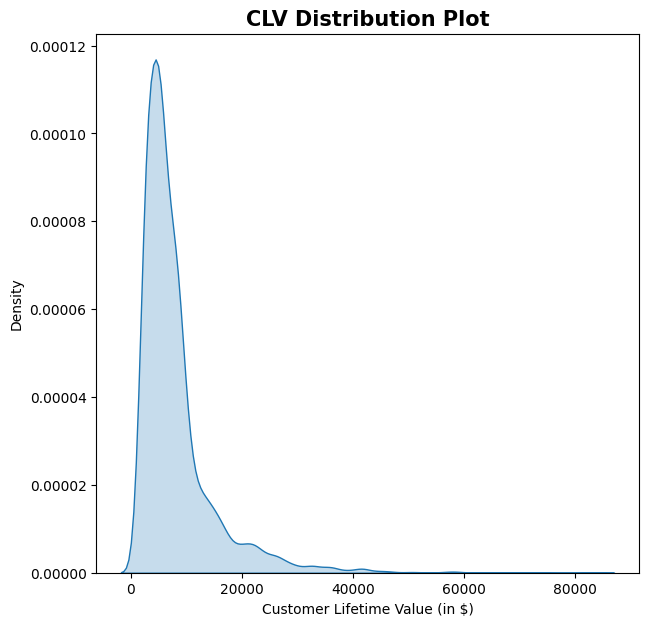

In [74]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.kdeplot(df['Customer Lifetime Value'], fill=True)
plt.xlabel('Customer Lifetime Value (in $)')
plt.title('CLV Distribution Plot', size=15, weight='bold')

Distribusi Positif-Skewed: Distribusi CLV tampak miring ke kanan, yang berarti sebagian besar pelanggan memiliki nilai CLV yang relatif rendah, sementara ada beberapa pelanggan dengan nilai CLV yang sangat tinggi (outlier).

**Jumlah data cakupan asuransi berdasarkan jenis kendaraan**

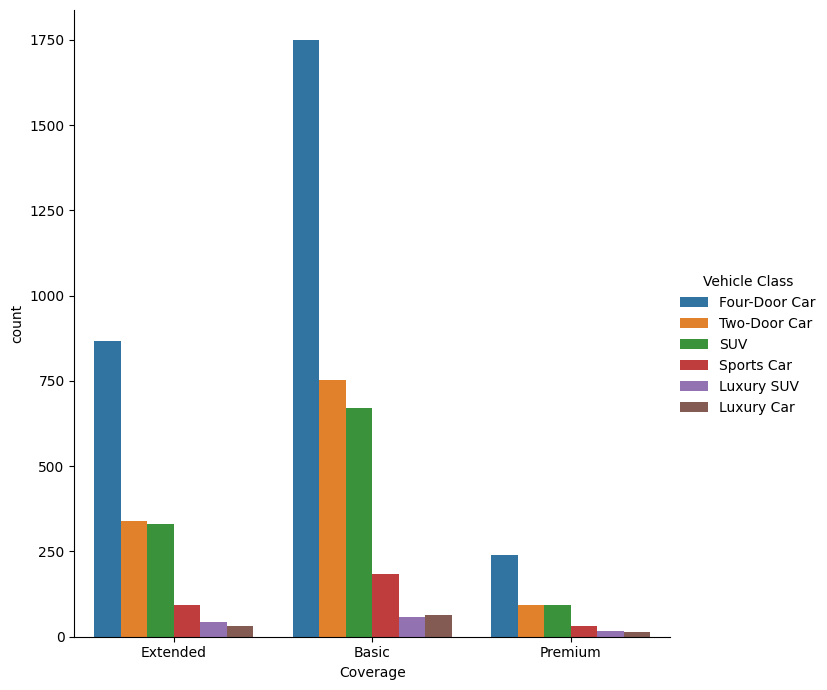

In [75]:
# Mengatur ukuran catplot
sns.catplot(
    x='Coverage',
    kind='count',
    hue='Vehicle Class',
    data=df,
    height=7,    # Tinggi plot (vertikal)
    aspect=1   # Rasio lebar terhadap tinggi
)

- Pelanggan dengan Basic Coverage adalah mayoritas, kemungkinan karena harganya yang lebih terjangkau.
- Four-Door Car lebih populer di semua kategori, menunjukkan fokus produk atau preferensi pelanggan terhadap jenis kendaraan ini.

In [76]:
df['Vehicle Class'].value_counts()

Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

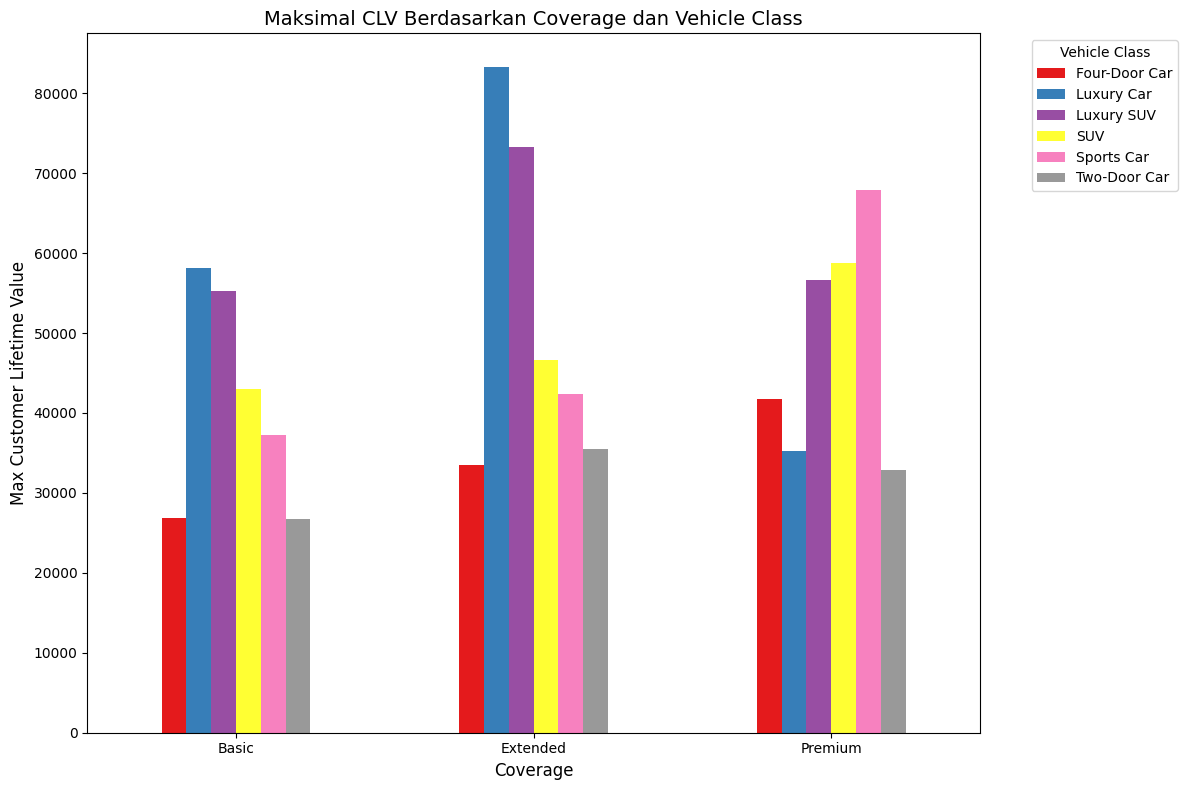

In [77]:
# Mencari nilai maksimal Customer Lifetime Value (CLV) berdasarkan kombinasi Coverage dan Vehicle Class
max_clv_grouped = df.groupby(['Coverage', 'Vehicle Class'])['Customer Lifetime Value'].max().unstack()

# Membuat barplot
max_clv_grouped.plot(kind='bar', figsize=(12, 8), colormap='Set1')
plt.title('Maksimal CLV Berdasarkan Coverage dan Vehicle Class', fontsize=14)
plt.xlabel('Coverage', fontsize=12)
plt.ylabel('Max Customer Lifetime Value', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Pelanggan dengan extended memiliki nili CLV yang paling tinggi di jenis mobil Luxury Car.

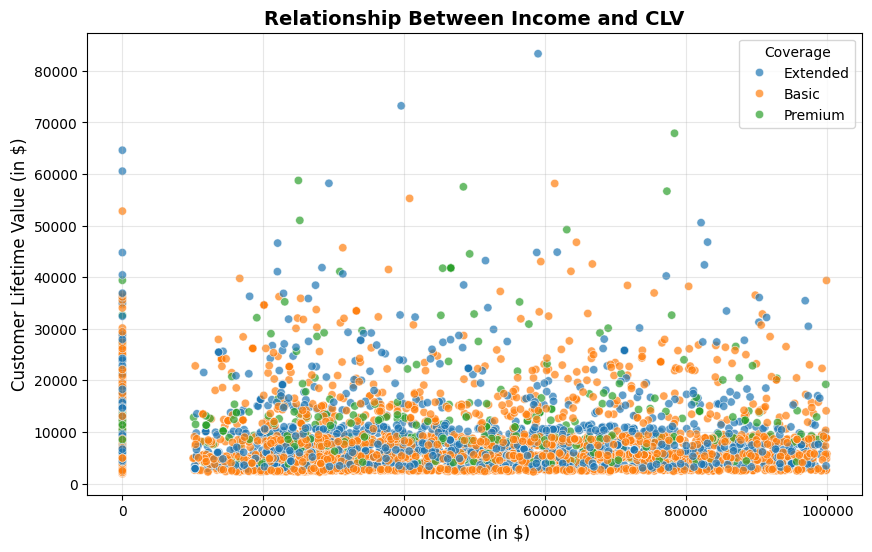

In [78]:
# Scatter plot to visualize the relationship between Income and Customer Lifetime Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Customer Lifetime Value', hue='Coverage', alpha=0.7)

plt.title('Relationship Between Income and CLV', fontsize=14, weight='bold')
plt.xlabel('Income (in $)', fontsize=12)
plt.ylabel('Customer Lifetime Value (in $)', fontsize=12)
plt.legend(title='Coverage')
plt.grid(alpha=0.3)
plt.show()

- Tidak ada hubungan linear yang jelas antara Income dan CLV; pelanggan dengan pendapatan rendah hingga tinggi memiliki distribusi CLV yang bervariasi.
- Beberapa pelanggan dengan Income rendah justru memiliki CLV yang tinggi.
- Pelanggan dengan Premium Coverage cenderung memiliki CLV yang lebih tinggi dibandingkan pelanggan dengan Basic atau Extended Coverage, meskipun pendapatan tidak selalu tinggi.

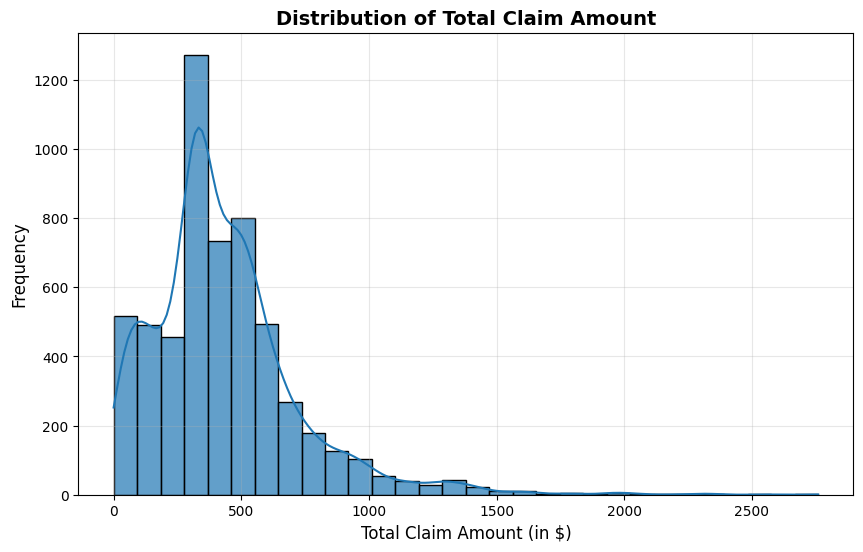

In [79]:
# Plotting the distribution of Total Claim Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Claim Amount'], bins=30, kde=True, alpha=0.7)

plt.title('Distribution of Total Claim Amount', fontsize=14, weight='bold')
plt.xlabel('Total Claim Amount (in $)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

1. Distribusi Positif-Skewed:

- Sebagian besar klaim pelanggan berada pada nilai yang relatif rendah, dengan jumlah klaim yang lebih tinggi menjadi semakin jarang (long tail).

2. Mayoritas Nilai Klaim:

- Sebagian besar klaim berada di rentang nilai rendah hingga menengah. Ini menunjukkan bahwa pelanggan umumnya mengajukan klaim kecil.

3. Outlier:

- Ada beberapa klaim dengan nilai sangat tinggi yang menjadi outlier dalam data ini. Klaim seperti ini dapat memengaruhi rata-rata secara signifikan.

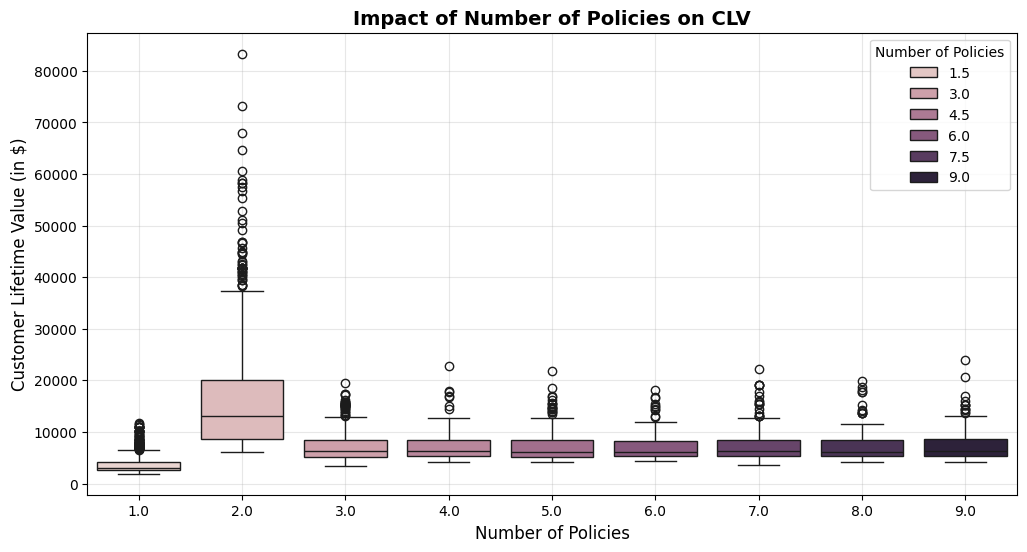

In [80]:
# Boxplot to visualize the impact of the number of policies on CLV
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Number of Policies', y='Customer Lifetime Value', hue='Number of Policies')

plt.title('Impact of Number of Policies on CLV', fontsize=14, weight='bold')
plt.xlabel('Number of Policies', fontsize=12)
plt.ylabel('Customer Lifetime Value (in $)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


1. Pola Umum:

- CLV cenderung meningkat dengan bertambahnya jumlah polis. Pelanggan dengan lebih banyak polis biasanya memiliki nilai CLV yang lebih tinggi.
- Namun, terdapat variabilitas yang cukup besar dalam CLV untuk setiap jumlah polis, terutama di jumlah polis yang lebih rendah.

2. Outlier:

- Ada beberapa pelanggan dengan jumlah polis rendah tetapi memiliki CLV yang sangat tinggi (outlier). Hal ini mungkin disebabkan oleh faktor lain seperti cakupan asuransi atau klaim.

3. Signifikansi Jumlah Polis:

- Pelanggan dengan jumlah polis lebih tinggi (misalnya, 5-6 polis) memiliki median CLV yang jauh lebih tinggi dibandingkan pelanggan dengan 1-2 polis.

4. Insight:
- Jumlah polis tampaknya menjadi indikator signifikan dalam menentukan CLV. Pelanggan dengan jumlah polis lebih banyak mungkin merupakan target potensial untuk peningkatan pendapatan melalui penjualan silang (cross-selling) produk tambahan.

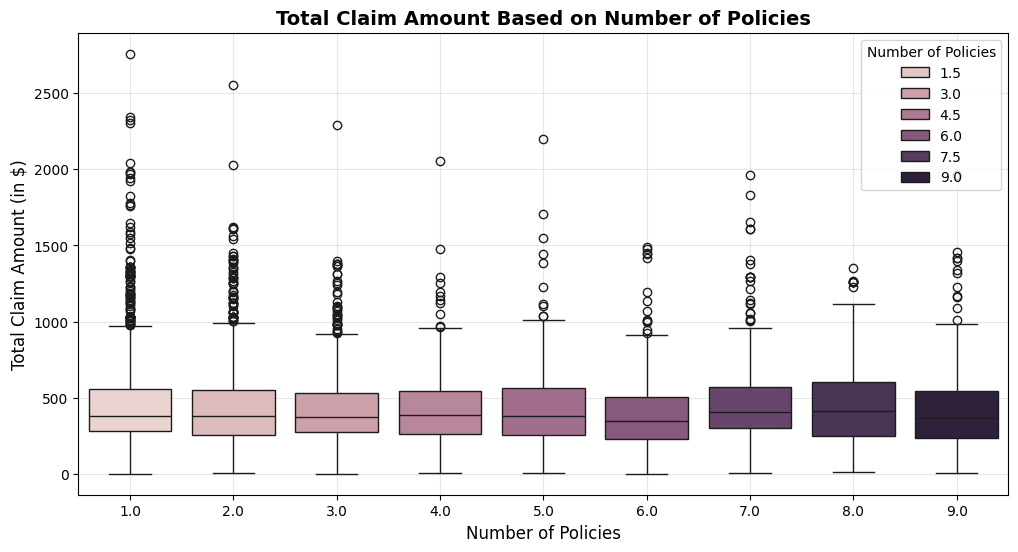

In [81]:
# Boxplot to visualize Total Claim Amount based on Number of Policies
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Number of Policies', y='Total Claim Amount', hue='Number of Policies')

plt.title('Total Claim Amount Based on Number of Policies', fontsize=14, weight='bold')
plt.xlabel('Number of Policies', fontsize=12)
plt.ylabel('Total Claim Amount (in $)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Berdasarkan visualisasi ini, tidak ada hubungan yang jelas dan konsisten antara jumlah polis dengan total klaim. Beberapa hal yang bisa kita amati:

1. Variasi yang Tinggi 

- Untuk setiap jumlah polis, terdapat variasi total klaim yang sangat besar.

2. Median yang Relatif Stabil

- Secara umum, median total klaim untuk setiap kategori jumlah polis cenderung relatif stabil. Ini menunjukkan bahwa meskipun ada variasi yang besar, nilai tengah dari distribusi cenderung tidak berubah secara signifikan.

3. Outlier

- Terdapat banyak outlier pada setiap kategori jumlah polis. Ini mengindikasikan adanya beberapa kasus di mana total klaim jauh lebih besar atau lebih kecil dibandingkan dengan klaim lainnya pada jumlah polis yang sama.

## Data Preprocesing

**Find Anomalies**

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Tidak terdapat data kosong pada dataset ini.

In [83]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


- Income memiliki nilai minimal nya 0. Selanjutnya kita akan cek apakah income yang bernilai 0 adalah nilai yang masuk akal, atau kesalahan dalam input data.
- Nilai rata - rata CLV di sekitar 8.000 sedangkan nilai maksimalnya di sekitar 83.000, ini menunjukan bahwa ada outliers di fitur ini.
- Di fitur lain juga memiliki outliers.

In [84]:
df_nilai = df[df['Income'] == 0]
df_nilai['Income'].value_counts()

Income
0.0    1429
Name: count, dtype: int64

In [85]:
education_group = df_nilai['Education'].value_counts()
education_group

Education
High School or Below    486
Bachelor                430
College                 422
Master                   60
Doctor                   31
Name: count, dtype: int64

In [86]:
employe_group = df_nilai['EmploymentStatus'].value_counts()
employe_group

EmploymentStatus
Unemployed    1429
Name: count, dtype: int64

In [87]:
df_nilai.groupby(['Education', 'EmploymentStatus'])['EmploymentStatus'].value_counts()

Education             EmploymentStatus
Bachelor              Unemployed          430
College               Unemployed          422
Doctor                Unemployed           31
High School or Below  Unemployed          486
Master                Unemployed           60
Name: count, dtype: int64

Pelanggan dengan pendidikan pada tingkat High School or Below atau College kemungkinan besar masih dalam masa pendidikan mereka sehingga belum memiliki pekerjaan dan penghasilan.

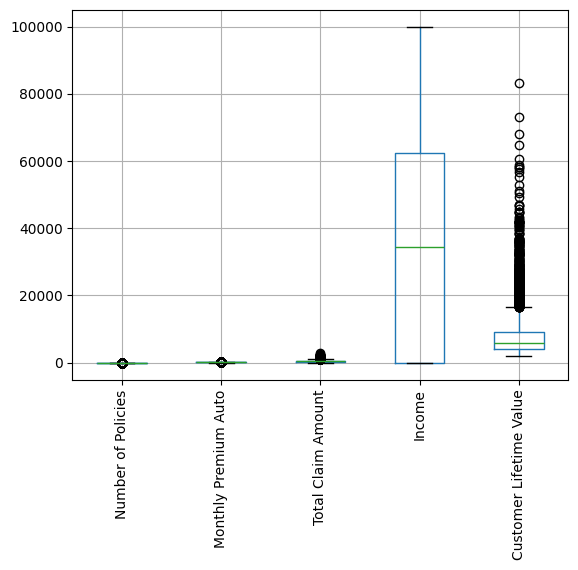

In [88]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

**Feature Enginering**

**Melakukan Metode IQR**

In [89]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

**CLV**

In [90]:
# Outliers pada fitur CLV
find_anomalies(df['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


In [91]:
# Cek CLV > $16646.5
df[df['Customer Lifetime Value'] > 16646.5].count()['Customer Lifetime Value']

np.int64(499)

In [92]:
# Cek deskriptif statistik kolom CLV
df['Customer Lifetime Value'].describe()

count     5669.000000
mean      8029.874592
std       6916.708246
min       1898.007675
25%       3954.344534
50%       5800.188903
75%       9031.214859
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

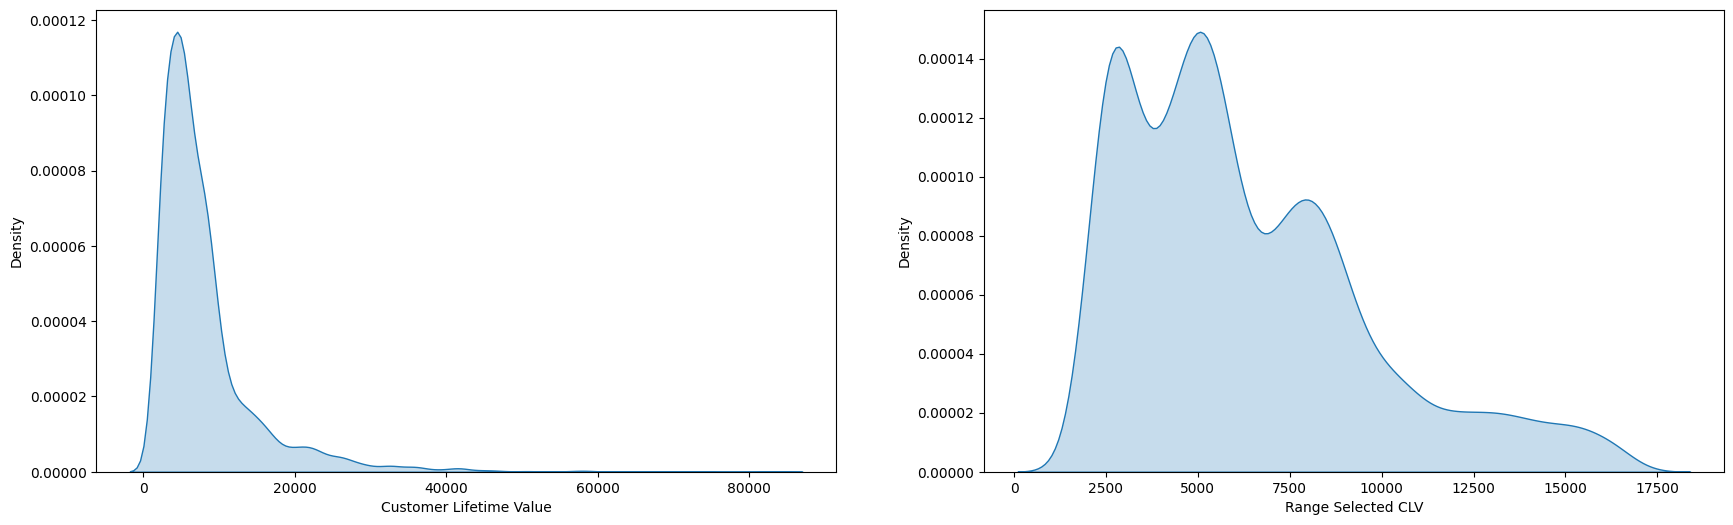

In [93]:
df_model = df[(df['Customer Lifetime Value'] <= 16646.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.kdeplot(df['Customer Lifetime Value'], fill=True, ax=axes[0])
sns.kdeplot(df_model['Customer Lifetime Value'], fill=True, ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected CLV');

**Income**

In [94]:
find_anomalies(df_model['Income'])

IQR: 62329.0
limit_bawah: -93493.5
limit_atas: 155822.5


In [95]:
df_model['Income'].describe()

count     5170.000000
mean     37817.266731
std      30473.425782
min          0.000000
25%          0.000000
50%      34336.000000
75%      62329.000000
max      99934.000000
Name: Income, dtype: float64

Nilai 0 adalah nilai yang masuk akal karena di asusmsikan pelanggan belum memiliki pekerjaan atau masih sekolah. Disini saya tidak melakukan penanganan pada nilai outliers karena kemungkinan besar fitur ini akan tidak terpakai.

**Monthly Premium Auto**

In [96]:
find_anomalies(df_model['Monthly Premium Auto'])

IQR: 39.0
limit_bawah: 9.5
limit_atas: 165.5


In [97]:
df_model['Monthly Premium Auto'].describe()

count    5170.000000
mean       90.829207
std        31.263879
min        61.000000
25%        68.000000
50%        80.000000
75%       107.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [98]:
# Cek Monthly Premium Auto > $165.5
df_model[df_model['Monthly Premium Auto'] > 165.5].count()['Monthly Premium Auto']

np.int64(191)

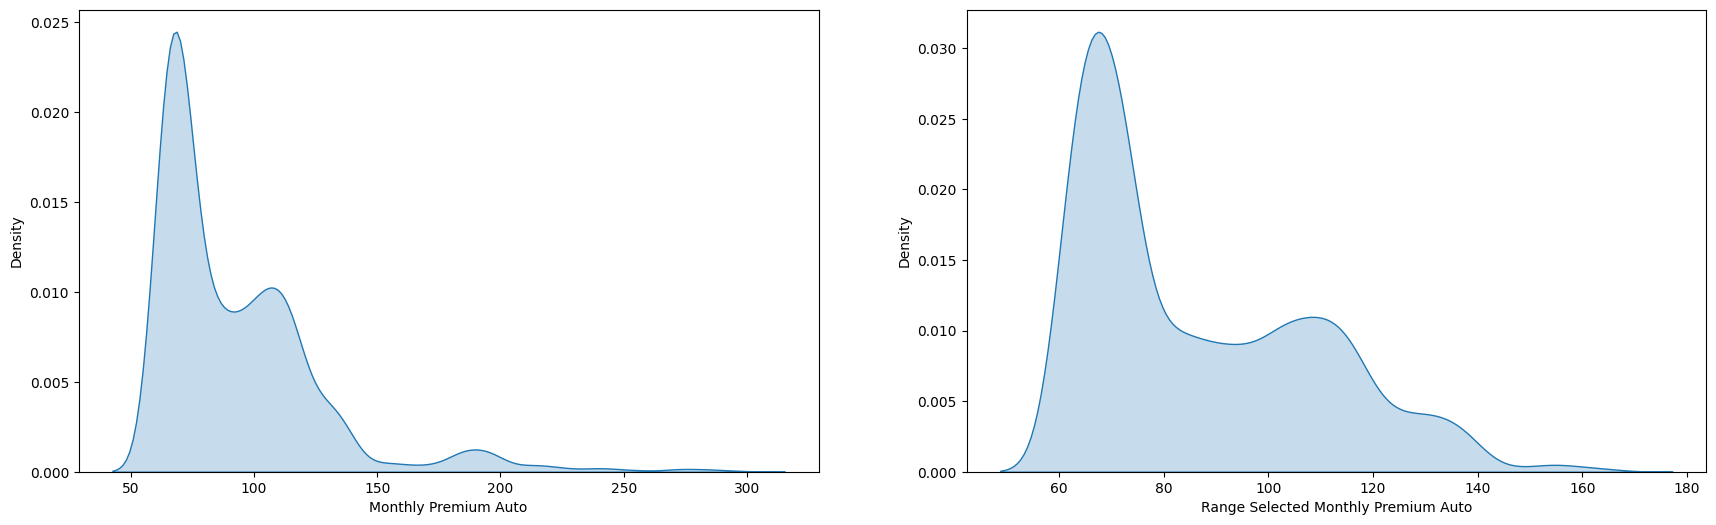

In [99]:
df_model = df_model[(df_model['Monthly Premium Auto'] <= 165.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.kdeplot(df['Monthly Premium Auto'], fill=True, ax=axes[0])
sns.kdeplot(df_model['Monthly Premium Auto'], fill=True, ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

**Total Claim Amount**

In [100]:
find_anomalies(df_model['Total Claim Amount'])

IQR: 270.62437
limit_bawah: -148.560925
limit_atas: 933.936555


In [101]:
df_model['Total Claim Amount'].describe()

count    4979.000000
mean      398.432911
std       231.488826
min         0.423310
25%       257.375630
50%       364.800000
75%       528.000000
max      1516.383753
Name: Total Claim Amount, dtype: float64

In [102]:
# Cek Monthly Premium Auto > $956.7
df_model[df_model['Total Claim Amount'] > 956.7].count()['Total Claim Amount']

np.int64(118)

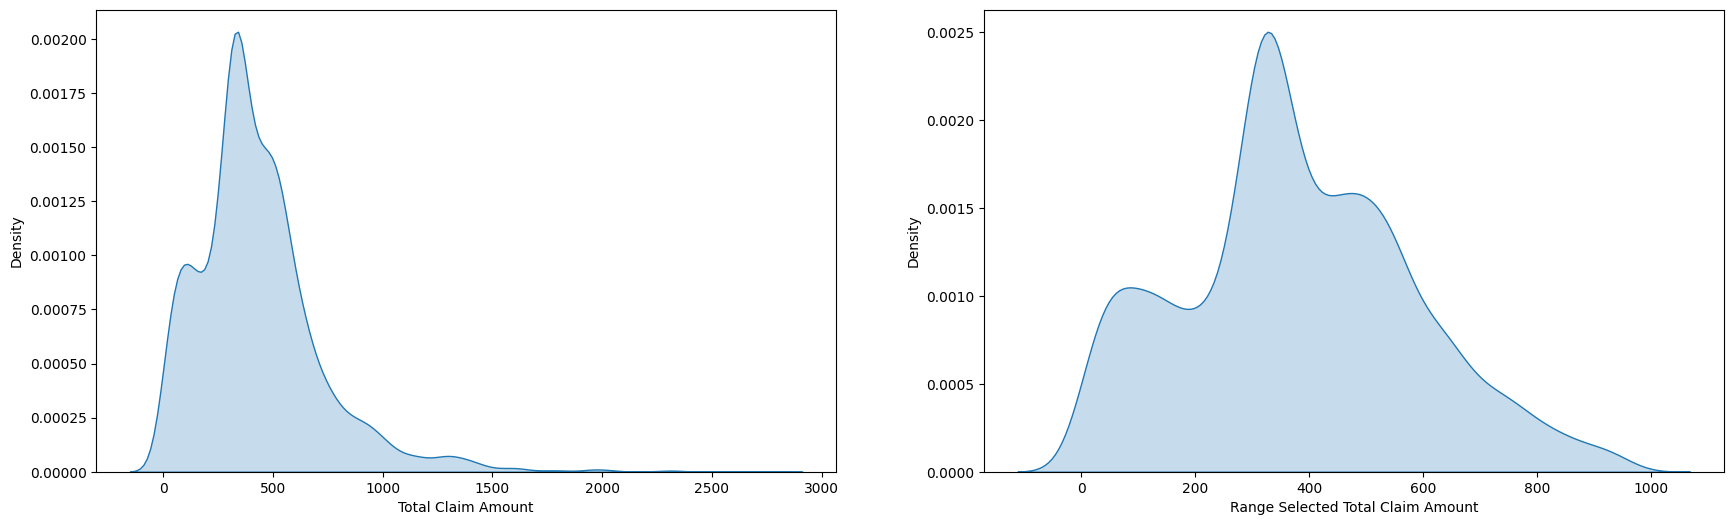

In [103]:
df_model = df_model[(df_model['Total Claim Amount'] <= 956.7)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.kdeplot(df['Total Claim Amount'], fill=True, ax=axes[0])
sns.kdeplot(df_model['Total Claim Amount'], fill=True, ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');

In [104]:
find_anomalies(df_model['Number of Policies'])

IQR: 3.0
limit_bawah: -3.5
limit_atas: 8.5


In [105]:
df_model['Number of Policies'].describe()

count    4861.000000
mean        3.047727
std         2.465687
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

Nilai extream tidak terlalu berpengaruh, tidak perlu kita lakukan feature enginering untuk fitur Number of Policies.

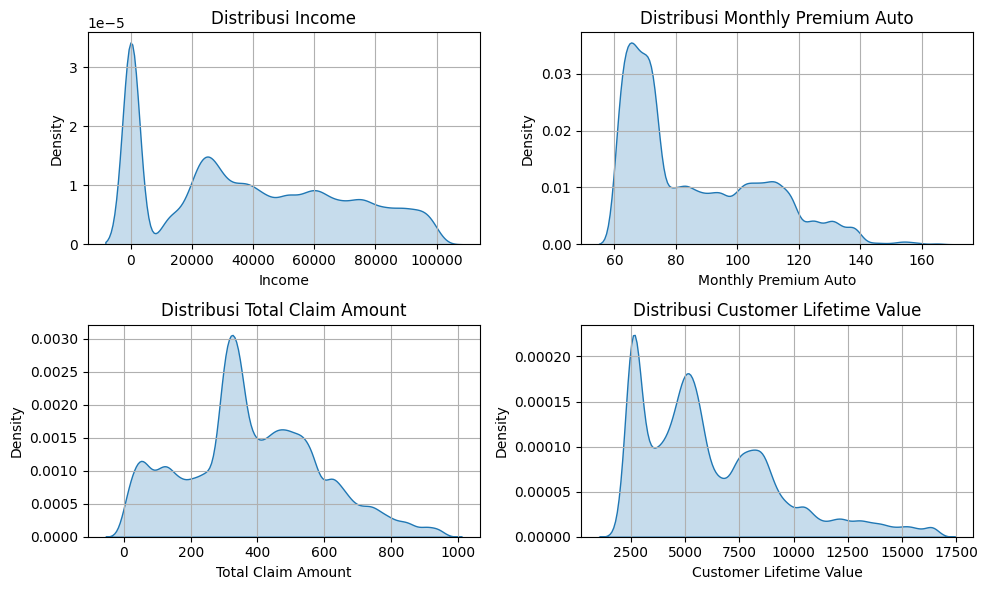

In [106]:
numeric_columns = ['Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']

# Reattempting KDE plot as data appears clean with no missing or invalid values
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df_model[column], fill=True, bw_adjust=0.5)
    plt.title(f'Distribusi {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

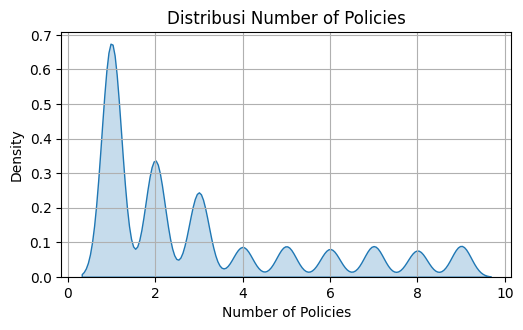

In [107]:
numeric_columns = ['Number of Policies']

# Reattempting KDE plot as data appears clean with no missing or invalid values
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df_model[column], fill=True, bw_adjust=0.5)
    plt.title(f'Distribusi {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

In [108]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4861 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4861 non-null   object 
 1   Coverage                 4861 non-null   object 
 2   Renew Offer Type         4861 non-null   object 
 3   EmploymentStatus         4861 non-null   object 
 4   Marital Status           4861 non-null   object 
 5   Education                4861 non-null   object 
 6   Number of Policies       4861 non-null   float64
 7   Monthly Premium Auto     4861 non-null   float64
 8   Total Claim Amount       4861 non-null   float64
 9   Income                   4861 non-null   float64
 10  Customer Lifetime Value  4861 non-null   float64
dtypes: float64(5), object(6)
memory usage: 455.7+ KB


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Data yang terhapus sebanyak 808, data yang tersisa adalah 4861. Selanjutnya kita akan mencari korelasi dan multikolinearitas antar fitur numerik.

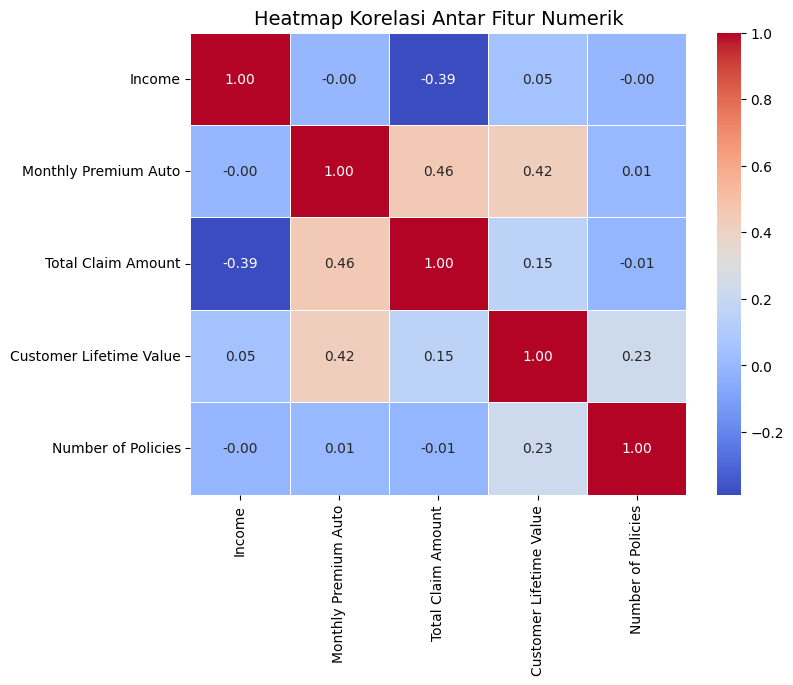

In [110]:
# Calculating the correlation matrix for numeric columns
numeric_columns = ['Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value', 'Number of Policies']
correlation_matrix = df_model[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=14)
plt.show()

- Monthly Premium Auto memiliki kemungkinan besar multikolinearitas terhadap Total Claim Amount.
- Monthly Premium Auto juga memiliki pengaruh yang tinggi terhadap Fitur CLV.
- Sesuai pemahaman data kita di atas Fitur Income tidak memiliki pengaruh terhadap Fitur CLV, diperkuat lagi dengan visualisasi heatmap di atas Fitur Income memang tidak mempengaruhi FItur CLV.

Langkah selanjutnya kita ankan menghapus Fitur Total Claim Amount dan fitur Income karena alasan yang sudah saya sebutkan di atas.

In [111]:
df_model.drop(columns=['Total Claim Amount', 'Income'], inplace=True)

**Feature Selection**

**Encoding**

In [112]:
onehot = OneHotEncoder(drop='first')
ordinal = OrdinalEncoder()

transformer = ColumnTransformer([
    ('one hot',onehot,['Vehicle Class',	'Coverage',	'Renew Offer Type', 'EmploymentStatus', 'Marital Status']),
    ('ordinal',ordinal,['Education'])
], remainder='passthrough')

**Spliting data**

In [113]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

In [114]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=10)

In [115]:
X_train

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto
4943,Four-Door Car,Basic,Offer3,Unemployed,Single,College,5.0,67.0
2167,Sports Car,Basic,Offer2,Unemployed,Single,Bachelor,4.0,108.0
927,Four-Door Car,Basic,Offer1,Retired,Single,College,5.0,67.0
2230,Four-Door Car,Basic,Offer3,Employed,Married,College,3.0,74.0
3551,Four-Door Car,Extended,Offer2,Employed,Married,Bachelor,1.0,77.0
...,...,...,...,...,...,...,...,...
1364,Two-Door Car,Basic,Offer1,Employed,Divorced,Bachelor,2.0,63.0
4006,SUV,Basic,Offer1,Medical Leave,Married,College,3.0,115.0
1560,Four-Door Car,Basic,Offer1,Unemployed,Single,Bachelor,1.0,73.0
5383,Four-Door Car,Extended,Offer3,Unemployed,Married,High School or Below,9.0,86.0


### Transformasi

In [116]:
X_train_preprocess = transformer.fit_transform(X_train)
X_test_preprocess = transformer.transform(X_test)

In [117]:
X_train_preprocess = pd.DataFrame(X_train_preprocess)
X_test_preprocess = pd.DataFrame(X_test_preprocess)

In [118]:
X_test_preprocess

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,72.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,127.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0,87.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,67.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,9.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,106.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,70.0
1456,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,61.0
1457,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,119.0


In [119]:
transformer.transformers_[0][1].get_feature_names_out()

array(['Vehicle Class_SUV', 'Vehicle Class_Sports Car',
       'Vehicle Class_Two-Door Car', 'Coverage_Extended',
       'Coverage_Premium', 'Renew Offer Type_Offer2',
       'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed',
       'Marital Status_Married', 'Marital Status_Single'], dtype=object)

In [120]:
transformer.transformers_

[('one hot',
  OneHotEncoder(drop='first'),
  ['Vehicle Class',
   'Coverage',
   'Renew Offer Type',
   'EmploymentStatus',
   'Marital Status']),
 ('ordinal', OrdinalEncoder(), ['Education']),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [6, 7])]

In [121]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + ['Number of Policies',	'Monthly Premium Auto']

In [122]:
X_train_preprocess.columns = feature_names
X_test_preprocess.columns = feature_names

In [123]:
X_train_preprocess

,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Coverage_Extended,Coverage_Premium,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Education,Number of Policies,Monthly Premium Auto
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,67.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,108.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,67.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,74.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,63.0
3398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,115.0
3399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,73.0
3400,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,9.0,86.0


**Feature Importance**

In [124]:
# Membuat model Random Forest untuk menghitung feature importance
rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train_preprocess, y_train)

# Mendapatkan feature importance dari model
feature_importances = pd.DataFrame({
    'Feature': X_train_preprocess.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Menampilkan fitur dengan tingkat kepentingan tertinggi
feature_importances.reset_index(drop=True, inplace=True)
feature_importances

,Feature,Importance
0,Number of Policies,0.693133
1,Monthly Premium Auto,0.244906
2,Education,0.013735
3,EmploymentStatus_Employed,0.007737
4,Vehicle Class_Two-Door Car,0.006211
5,EmploymentStatus_Unemployed,0.005995
6,Renew Offer Type_Offer2,0.005821
7,Renew Offer Type_Offer3,0.004606
8,Marital Status_Married,0.004582
9,Marital Status_Single,0.003959


Fitur Number of Policies dan Monthly Premium Auto adalah fitur yang mendominasi pengaruh terhadap prediksi, selanjutnya kita akan cek multikolinearitas antar fitur untuk mengoptimalisasi pemodelan nantinya.

In [125]:
# Fungsi untuk menghitung nilai VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data["Acceptable"] = vif_data["VIF"].apply(lambda x: "Yes" if x < 10 else "No")
    return vif_data

# Menghitung VIF untuk dataset hasil preprocessing
vif_df = calculate_vif(X_train_preprocess)

# Menampilkan hasil VIF
vif_df

,Feature,VIF,Acceptable
0,Vehicle Class_SUV,3.537438,Yes
1,Vehicle Class_Sports Car,1.810584,Yes
2,Vehicle Class_Two-Door Car,1.419120,Yes
3,Coverage_Extended,2.391871,Yes
4,Coverage_Premium,1.997427,Yes
5,Renew Offer Type_Offer2,1.988594,Yes
6,Renew Offer Type_Offer3,1.448396,Yes
7,Renew Offer Type_Offer4,1.402310,Yes
8,EmploymentStatus_Employed,14.768976,No
9,EmploymentStatus_Medical Leave,2.088929,Yes


Saya menggunakan ambang batas untuk fitur yang di terima adalah 10 untuk nilai VIF nya, bisa kita lihat bahwa fitur Monthly Premium Auto memiliki nilai VIF yang sangat tinggi. Di sisi lain fitur ini sangat berpengaruh terhadap nilai CLV, maka dari itu kemungkinan akan saya pertahankan dengan mengahapus fitur lain

In [126]:
# Menghapus 25% fitur dengan nilai feature importance terendah
low_importance_features = feature_importances.tail(int(0.25 * len(feature_importances)))['Feature']
X_train_reduced = X_train_preprocess.drop(columns=low_importance_features)
X_test_reduced = X_test_preprocess.drop(columns=low_importance_features)

# Menghitung VIF kembali setelah penghapusan fitur
vif_reduced_df = calculate_vif(X_train_reduced)

# Menampilkan VIF untuk memastikan nilai VIF Monthly Premium Auto
vif_reduced_df

,Feature,VIF,Acceptable
0,Vehicle Class_Two-Door Car,1.301245,Yes
1,Coverage_Extended,1.592545,Yes
2,Renew Offer Type_Offer2,1.937636,Yes
3,Renew Offer Type_Offer3,1.422481,Yes
4,Renew Offer Type_Offer4,1.363974,Yes
5,EmploymentStatus_Employed,6.365058,Yes
6,EmploymentStatus_Retired,1.230454,Yes
7,EmploymentStatus_Unemployed,3.162903,Yes
8,Marital Status_Married,4.638754,Yes
9,Marital Status_Single,2.660735,Yes


Saya telah menghapus 25% dari fitur yang nilai importance nya kecil, ternyata nilai VIF dari fitur Monthly Premium Auto sudah turun hingga hampir ke ambang batas yang di terima dalam nilai VIF. Selanjutnya kita akan lanjut ke pemodelan dengan fitur yang tersisa

In [127]:
# Mengembalikan nama variabel
X_train = X_train_reduced
X_test = X_test_reduced

## Model

**Benchmark Beberapa Model**

In [128]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_rmsle = []
nilai_mean_rmsle = []
nilai_std_rmsle = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    #RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # RMSLE
    model_cv_rmsle = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_log_error', 
        error_score='raise'
        )

    print(model_cv_rmsle, i)

    score_rmsle.append(model_cv_rmsle)
    nilai_mean_rmsle.append(model_cv_rmsle.mean())
    nilai_std_rmsle.append(model_cv_rmsle.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2936.5529827  -2827.39242464 -2913.23920785 -2961.26465603
 -2870.09636719] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.43201712 -0.41261635 -0.42559893 -0.42278136 -0.42075457] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.33758679 -0.33356602 -0.3358212  -0.3350584  -0.33074403] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2753.36111591 -2541.78596732 -2718.94785343 -2606.8863533
 -2493.38715664] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.41613147 -0.36852739 -0.40129394 -0.37422766 -0.37173132] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegres

In [129]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSLE': nilai_mean_rmsle,
    'Std_RMSLE': nilai_std_rmsle,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSLE,Std_RMSLE,Mean_RMSE,Std_RMSE,Mean_MAPE,Std_MAPE
0,Linear Regression,-0.422754,0.006335,-2901.709128,47.783338,-0.334555,0.002304
1,KNN Regressor,-0.386382,0.018913,-2622.873689,99.854684,-0.263366,0.012738
2,DecisionTree Regressor,-0.110377,0.005112,-1153.339167,61.927333,-0.046236,0.002583
3,RandomForest Regressor,-0.089008,0.002518,-918.951316,39.978907,-0.040289,0.002825
4,XGBoost Regressor,-0.098032,0.003944,-983.385906,58.819559,-0.046705,0.002661


Setelah dilakukan Benchmark Model, model Random Fores memiliki nilai terbaik. Selanjutnya kita akan membuat benchmar antara 2 model terbaik yaitu XGBoost dan Random Fores.

**Bencmark 2 Model Terbaik**

In [130]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_rmsle = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_rmsle.append(np.sqrt(mean_squared_log_error(y_test, y_pred)))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'RMSLE': score_rmsle, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,RMSLE,MAPE
XGB,1004.193547,0.116984,0.062989
RandomForest,960.694835,0.093911,0.041323


Random Forest masih menduduki nilai terbaik, selanjutnya kita akan melakukan Hyperparameter Tuning menggunakan mdoel Random Forest.

**Hyperparameter Tuning**

In [131]:
# Hyperparameter space
hyperparam_space_rf = {
    'model__n_estimators': [140, 150, 160],  
    'model__max_depth': [10, 15, 20],       
    'model__min_samples_split': [4, 5, 6],  
    'model__min_samples_leaf': [2, 3, 4],   
    'model__max_features': ['sqrt'],        
    'model__max_leaf_nodes': [30, 40, 50],  
    'model__max_samples': [0.8, 0.9, 1.0]  
}

# Pipeline untuk RandomForest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=1, bootstrap=True))
])

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=hyperparam_space_rf,
    n_iter=50,  
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42 
)

In [132]:
# Melatih RandomSearch
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__max_depth': [10, 15, 20],
                                        'model__max_features': ['sqrt'],
                                        'model__max_leaf_nodes': [30, 40, 50],
                                        'model__max_samples': [0.8, 0.9, 1.0],
                                        'model__min_samples_leaf': [2, 3, 4],
                                        'model__min_samples_split': [4, 5, 6],
                                        'model__n_estimators': [140, 150, 160]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [133]:
# Menampilkan hasil terbaik
print("Best Parameters for RandomForest:", random_search_rf.best_params_)
print("Best Score (neg MSE):", random_search_rf.best_score_)

Best Parameters for RandomForest: {'model__n_estimators': 150, 'model__min_samples_split': 6, 'model__min_samples_leaf': 2, 'model__max_samples': 0.9, 'model__max_leaf_nodes': 50, 'model__max_features': 'sqrt', 'model__max_depth': 10}
Best Score (neg MSE): -1724782.9400870912


**Prediksi ke test set dengan tune model**

In [134]:
# Prediksi pada test set
y_pred_rf = random_search_rf.predict(X_test)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# RMSLE
rmsle_rf = np.sqrt(mean_squared_log_error(y_test, y_pred_rf))

# MAPE
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Simpan hasil evaluasi ke dalam DataFrame
score_rf = pd.DataFrame({
    'RMSE': [rmse_rf],
    'RMSLE': [rmsle_rf],
    'MAPE': [mape_rf]
}, index=['RandomForest'])

# Tampilkan hasil evaluasi
score_rf


,RMSE,RMSLE,MAPE
RandomForest,1279.535553,0.169098,0.133032


Ternyata setelah melakukan tuning, performa model makin menurun. Ini menandakan bahwa model sebelum di tuning sudah baik performanya, maka dari itu kita akan menggunakan basic model untuk menjadi final model kita.

**Final Model**

In [135]:
# Final model
model = {'RandomForest': RandomForestRegressor(random_state=1)}

score_rmse = []
score_rmsle = []
score_mape = []

# Prediksi pada test set
for i in model:

    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model[i])
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_rmsle.append(np.sqrt(mean_squared_log_error(y_test, y_pred)))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_final_model = pd.DataFrame({'RMSE': score_rmse, 'RMSLE': score_rmsle, 'MAPE': score_mape}, index=model.keys())
score_final_model

,RMSE,RMSLE,MAPE
RandomForest,960.694835,0.093911,0.041323


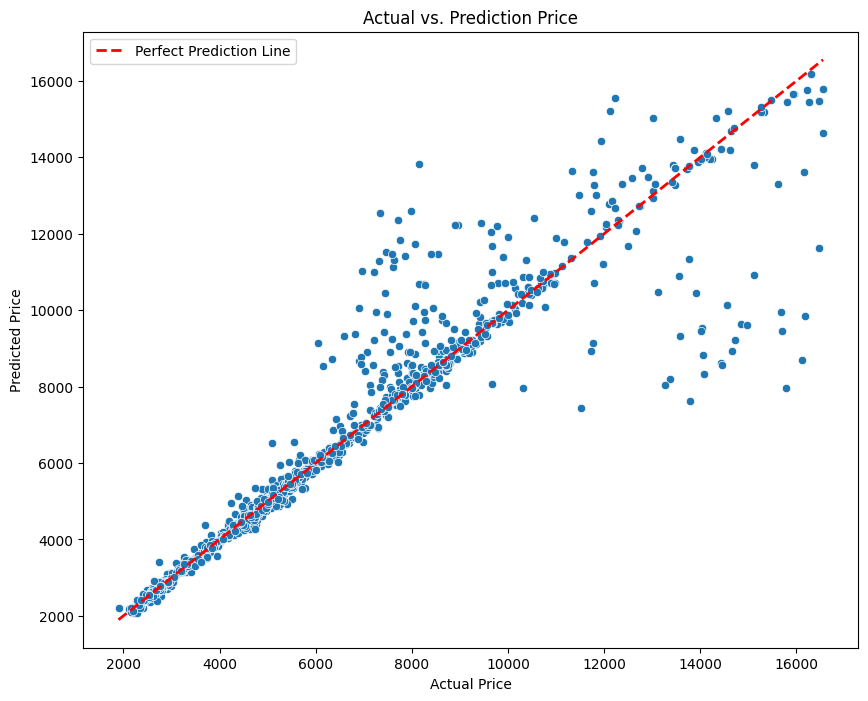

In [136]:
plt.figure(figsize=(10, 8))
# Scatter plot untuk nilai aktual vs prediksi
sns.scatterplot(x=y_test, y=y_pred).set(
    title='Actual vs. Prediction Price', 
    xlabel='Actual Price', 
    ylabel='Predicted Price'
)

# Tambahkan garis diagonal (y=x)
min_value = min(y_test.min(), y_pred.min())
max_value = max(y_test.max(), y_pred.max())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Tambahkan legenda
plt.legend()
plt.show()


- Sebagian besar titik tersebar dekat dengan garis diagonal merah, yang menunjukkan bahwa model mampu memprediksi nilai dengan akurasi yang baik.
- Namun, terdapat beberapa penyimpangan pada nilai CLV tinggi (di atas 12,000), di mana titik-titik semakin menjauh dari garis diagonal, menunjukkan bahwa model mengalami kesulitan untuk memprediksi dengan akurasi tinggi pada rentang nominal tersebut.
- Distribusi yang cukup merata di sepanjang garis merah mengindikasikan model memiliki bias yang rendah.
- Model memiliki batasan untuk memprediksi nilai CLV ynag tinggi.

## Konklusi

Metrik evaluasi yang digunakan pada model adalah RMSE, RMSLE, dan MAPE. Berdasarkan hasil evaluasi, nilai MAPE yang dihasilkan oleh model adalah sebesar 4.13%, yang mengindikasikan bahwa jika model ini digunakan untuk memprediksi Customer Lifetime Value (CLV) pada rentang nilai seperti yang terdapat dalam data training (nilai CLV maksimal sebesar 16,589), maka rata-rata prediksi model akan meleset sekitar 4.13% dari nilai aktualnya. Model memiliki performa yang baik dengan nilai RMSE 960.69, menunjukkan rata-rata deviasi prediksi dari nilai aktual cukup rendah dalam satuan harga. Nilai RMSLE 0.0939 yang rendah juga mengindikasikan bahwa model mampu menangani variasi skala harga dengan baik, terutama pada rentang harga yang luas.

Namun, seperti yang terlihat pada visualisasi antara nilai aktual dan prediksi, terdapat beberapa outliers pada data yang menyimpang cukup jauh dari garis "Perfect Prediction Line". Hal ini menunjukkan bahwa meskipun model mampu memberikan prediksi yang cukup baik secara umum, model masih memiliki bias terutama pada data dengan nilai CLV yang sangat tinggi. Bias ini mungkin disebabkan oleh terbatasnya fitur dalam dataset yang digunakan untuk melatih model. Beberapa aspek penting yang mungkin dapat meningkatkan prediksi CLV, seperti interaksi pelanggan atau layanan yang diterima pelanggan, tidak tercakup dalam dataset. Dengan kata lain, model ini cukup di percaya untuk rentang nilai target yang rendah dan dapat kurang di percaya di rentang nilai yang tinggi.

## Rekomendasi

1. Penambahan fitur yang relevan dengan nilai Customer Lifetime Value (CLV) misalnya, fitur terkait riwayat pelanggan, seperti durasi hubungan dengan perusahaan (jumlah tahun sebagai pelanggan) dan frekuensi pembelian atau perpanjangan polis, dapat membantu model memahami loyalitas dan pola perilaku pelanggan.

2. Penambahan variasi data sangat penting untuk meningkatkan kemampuan model dalam memahami pola dan hubungan yang lebih kompleks, terutama pada rentang nilai yang tinggi. Dengan menyediakan data yang lebih beragam, model dapat belajar untuk menangani skenario yang lebih luas dan memperbaiki akurasi prediksi. Jika data hanya berfokus pada rentang nilai yang rendah, model mungkin kesulitan menggeneralisasi atau memprediksi dengan baik pada nilai yang lebih tinggi.

In [144]:
estimator = Pipeline([('scaler', scaler), ('model', RandomForestRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('RandomForest_model2.pkl', 'wb'))